# How many hours should a first time college student take in order to be successful?

by Darin Young | DSC 680 - Applied Data Science | June 2025

# Business Problem

My project is centered around the idea that students at Midwestern State University (MSU) (and other regional universities) are encouraged to enroll in a “full-time” load so that they can graduate “on-time” (within 4-6 years). Considering that MSU is a regional public university and not an exclusive university that has a rigorous and selective admittance process, the student quality is potentially lesser than that of universities that are more selective. With that in mind, my hypothesis is: 

**First time students at MSU (and similar schools) would benefit by taking a lighter load (less classes) in their first semester so that their transition from high school to college is easier and more manageable.** 

If my hypothesis is true, there may be reason to encourage first time students to follow this method to increase retention and completion rates. 

# Background/History

As part of the completion of the capstone course of my Master's Program at Bellevue University, I was asked to complete three totally open ended research projects. Considering my role as a Data Analyst at Midwestern State, I felt it was an excellent opportunity to answer some institutional research questions regarding our students. So, I sought out advice from executive leadership and other leaders on campus on questions to research. The first question that came to me was from my supervisor, Dr. Harris. **Dr. Harris felt there was possibly a link between students taking more classes in their first term and lower success rates.** Additionally, they felt that advisors were encouraging students to register for a "full-load" (15 hours) which was exacerbating the potential issue. So, I decided to deep-dive on the question to see if there was any link between a students load and their level of success in college. 

# Data Explanation

## Data Dictionary

The data for this project is real student data from Fall 2013 to Fall 2022. It has been anonymized for student privacy.

For context, each row in the dataset represents a student's enrollment in a given term and each column describes their enrollment. The columns included are described below:

- TERM:
    - Term value for the row. Follows the format yyyytt where yyyy represents the annual year and tt represents the term.
    - Eg. 201410 = Fall 2013, 201420 = Spring 2014, 201610 = Fall 2015, etc.).
- STUDENTID
    - Unique student identifier, anonymized before loading. 
- SEX
    - Legal sex of student.
    - M = Male, F = Female
- AGE
    - Numeric age value of the student during the given term
- TERMHRS
    - Number of credit hours the student enrolled in during the given term
- ACTCOMPOSITE
    - Student's composite ACT score upon admittance
- SATOVERALL
    - Student's overall SAT score upon admittance
- HSRANK
    - Student's high school rank upon graduation
- HSSIZE
    - Student's high school class size upon graduation
- HSGPA
    - Student's high school GPA upon graduation
- RETAINEDTONEXTSPRING
    - Whether or not the student was retained to the next spring.
    - 1 = Graduated, 2 = Retained, 3 = Not retained
- RETAINEDTONEXTFALL
    - Whether or not the student was retained to the next fall.
    - 1 = Graduated, 2 = Retained, 3 = Not retained
- GRAD4
    - Whether or not the student graduated within 4 years.
    - 4 = graduated within 4 years, 0 = didn't graduate within 4 years
- GRAD6
    - Whether or not the student graduated within 6 years.
    - 6 = graduated within 4 years, 0 = didn't graduate within 6 years
- BFRCOHORT
    - Term that the student entered as a first-time, full-time student.
    - Matches the same format as the "TERM" column

## Data Preparation

To begin the process of preparing the data for my analysis, I first load in pandas to utilize the dataframe structure - which I will utilize for the entire analysis. 

In [11]:
import pandas as pd

df = pd.read_csv("Student Enrollment Data.csv")
df.head()

,TERM,STUDENTID,SEX,AGE,TERMHRS,ACTCOMPOSITE,SATOVERALL,HSRANK,HSSIZE,HSGPA,RETAINEDTONEXTSPRING,RETAINEDTONEXTFALL,GRAD4,GRAD6,BFRCohort
0,201410,Student1,F,25,6,23,1010,,,,2,1,0,6,
1,201410,Student2,M,31,12,,910,,,,2,1,0,6,
2,201410,Student3,F,55,3,,,,,,1,1,0,6,
3,201410,Student4,F,39,3,,,,,,1,1,0,0,
4,201410,Student5,F,54,6,,,92,523,2.96,2,1,0,6,


#### Load Categories

As a reminder, the question I'm trying to answer is how a student's course load affects their success. To make things easier, I'll first create two mutually exclusive categories: "Load_Heavy" and "Load_Light". For this analysis, I am defining light load students as those who take either 12, 13 or 14 credit hours and heavy load students as those who take 15 or more. Anything under 12 hours is considered "part-time" and I will not be considering part-time students for this analysis. 

The process to create these new categorical columns (using 1/0 flags) is shown below, as well as a preview of the data after the change. 

In [14]:
# Create binary flags based on TERMHRS
df['LOAD_HEAVY'] = ((df['TERMHRS'] >= 15)).astype(int)
df['LOAD_LIGHT'] = ((df['TERMHRS'] >= 12) & (df['TERMHRS'] < 15)).astype(int)

df[['STUDENTID', 'TERMHRS', 'LOAD_HEAVY', 'LOAD_LIGHT']].head(10)

,STUDENTID,TERMHRS,LOAD_HEAVY,LOAD_LIGHT
0,Student1,6,0,0
1,Student2,12,0,1
2,Student3,3,0,0
3,Student4,3,0,0
4,Student5,6,0,0
5,Student6,9,0,0
6,Student7,16,1,0
7,Student8,3,0,0
8,Student9,12,0,1
9,Student10,13,0,1


#### High School Rank Percentage

Additionally, the two columns "HSRANK" and "HSSIZE" are fairly meaningless on their own, and should be evaluated as a percentage. With that said, the process shown below details the creation of a new column called "HSRANKPERCENT" which will be used as a matching tool later on. 

In [17]:
df['HSRANK'] = pd.to_numeric(df['HSRANK'], errors='coerce').fillna(0).astype(int)
df['HSSIZE'] = pd.to_numeric(df['HSSIZE'], errors='coerce').fillna(1).astype(int)  # Avoid division by zero
df['HSRANKPERCENT'] = df['HSRANK'] / df['HSSIZE']

In [18]:
df['BFRCohort'] = df['BFRCohort'].astype(str)
df['TERM'] = df['TERM'].astype(str)


df_cohort = df[df['BFRCohort'] == df['TERM']]
df_cohort.head()

,TERM,STUDENTID,SEX,AGE,TERMHRS,ACTCOMPOSITE,SATOVERALL,HSRANK,HSSIZE,HSGPA,RETAINEDTONEXTSPRING,RETAINEDTONEXTFALL,GRAD4,GRAD6,BFRCohort,LOAD_HEAVY,LOAD_LIGHT,HSRANKPERCENT
849,201410,Student850,F,23,17,,1040,229,410,3.09,2,3,0,0,201410,1,0,0.558537
1106,201410,Student1107,M,23,12,,950,287,383,2.44,2,2,0,0,201410,0,1,0.749347
1213,201410,Student1214,M,19,13,,1160,76,353,3.98,2,2,0,6,201410,0,1,0.215297
1681,201410,Student1682,M,18,16,19,940,57,61,2.42,2,2,0,6,201410,1,0,0.934426
1858,201410,Student1859,F,18,16,,900,373,768,2.79,2,2,0,6,201410,1,0,0.485677


# Methods

For this analysis, I felt the methods described below are most appropriate:

- **Exploratory Data Analysis**
    - The first thing I will do is explore the data to see if there are any interesting trends that emerge. Here are some specific examples that I will utilize:
        - Distribution of credit hours among first-time students
            - Do students actually take a heavy load more often than a light load?
        - Retention and graduation rates by “load category”
- **T-Tests and ANOVA**
    - Then, I will use T-tests to determine if there are is a statistically significant difference between the two groups.
    - Depending on the results, I may further break down the load categories into light, normal, and heavy and then perform an ANOVA to again determine if there are any significant differences between the groups.
- **Logistic Regression**
    - Then, I will create a logistic regression model to predict binary outcomes like “retained to next semester” or graduated/not graduated based on a student's load category.
- **Propensity Score Matching**
    - I think it would be very interesting to match students with similar backgrounds coming into college (high school GPA, high school rank percentage, SAT/ACT scores, etc.) and compare their level of success depending on load category.
    - This method would help to reinforce the causal inference of the hypothesis by assuming all other factors are (generally) equal aside from course load.
 
**For full transparency, I did utilize ChatGPT to assist with writing some of the code included in this analysis.**

# Analysis

## Exploratory Analysis

#### Cohort Size over Time

As stated, the first stage of my analysis is simply exploring the data to see if any interesting trends related to this problem emerge. To start, let's quickly just look at the size of our cohorts over time. 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

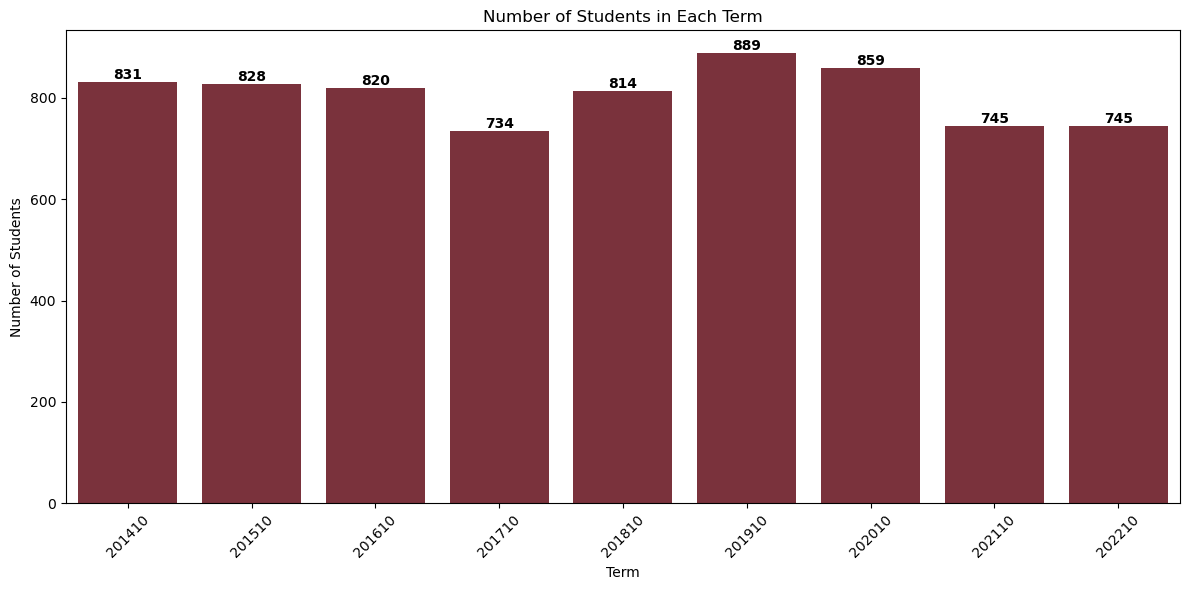

In [26]:
# Count students per term
term_counts = df_cohort['TERM'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=term_counts.index, y=term_counts.values, color='#862633')

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Number of Students in Each Term')
plt.xlabel('Term')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Credit Hour Distribution

The next piece I'm interested in is seeing what is most common for fall cohort students as it relates to course load. 

As shown below, it seems that a 15 hour load is most common, with 12 hour load being the next most common. Overall though, it seems that students generally prefer to take more hours in their first semester. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


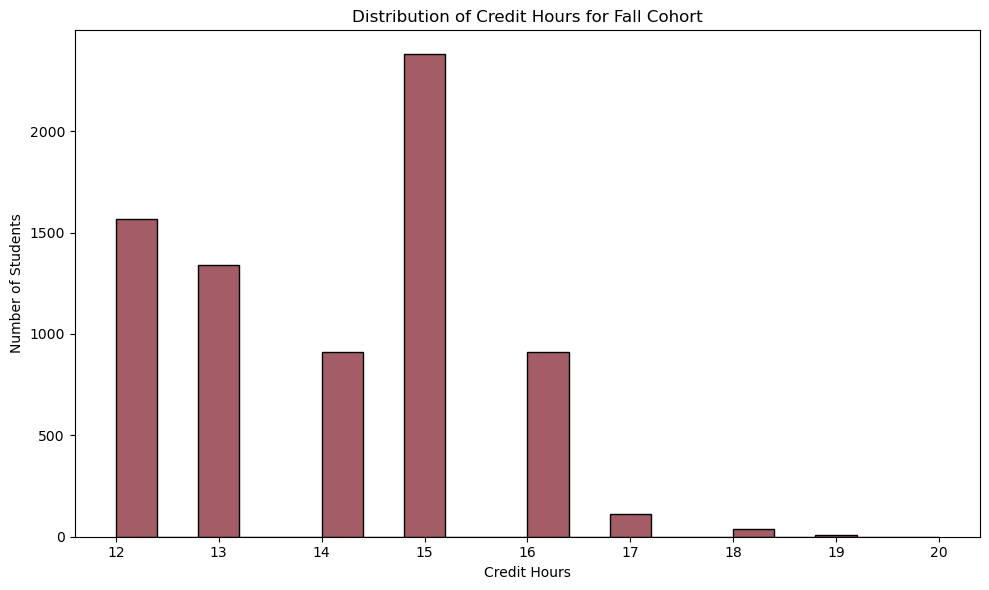

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cohort['TERMHRS'], bins=20, color='#862633', edgecolor='black')
plt.title('Distribution of Credit Hours for Fall Cohort')
plt.xlabel('Credit Hours')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

### Retention Rates

The next piece that I'm interested in, and the first success metric that we will be utilizing, is retention rates. Specifically, the two that I will be utilizing is fall to spring retention, and fall to fall retention. 

Below is an overall picture of retention rates for both fall and spring over the recent past. 

**Generally speaking, retention rates at MSU have declined slightly over time, but have mostly stayed around 85-90% for fall to spring and 60-70% for fall to fall.**

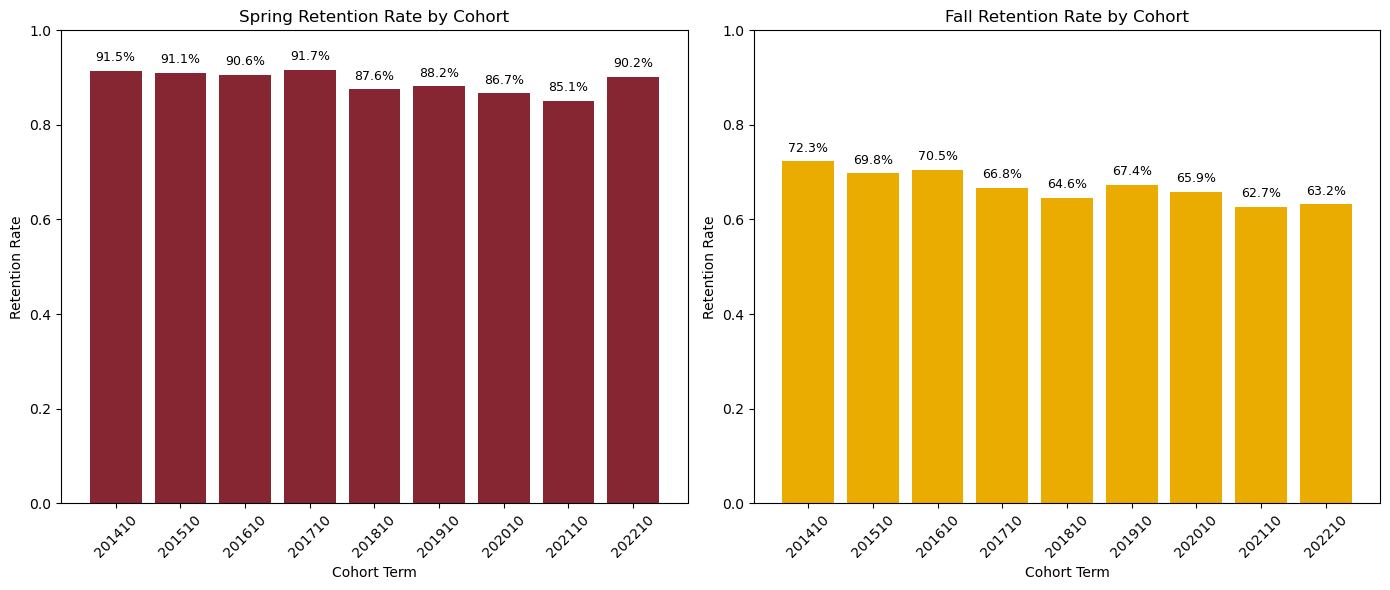

In [32]:
# Calculate overall fall and spring retention rates by cohort
spring_retention_rate = df_cohort.groupby('BFRCohort')['RETAINEDTONEXTSPRING'].apply(lambda x: (x == 2).mean())
fall_retention_rate = df_cohort.groupby('BFRCohort')['RETAINEDTONEXTFALL'].apply(lambda x: (x == 2).mean())

# Combine into a single DataFrame for plotting
retention_df = pd.DataFrame({
    'Spring Retention': spring_retention_rate,
    'Fall Retention': fall_retention_rate
}).fillna(0)

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Spring retention plot
axes[0].bar(retention_df.index, retention_df['Spring Retention'], color='#862633')
axes[0].set_title('Spring Retention Rate by Cohort')
axes[0].set_ylabel('Retention Rate')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Cohort Term')
axes[0].tick_params(axis='x', rotation=45)
for i, val in enumerate(retention_df['Spring Retention']):
    axes[0].text(i, val + 0.02, f'{val*100:.1f}%', ha='center', fontsize=9)

# Fall retention plot
axes[1].bar(retention_df.index, retention_df['Fall Retention'], color='#EAAC00')
axes[1].set_title('Fall Retention Rate by Cohort')
axes[1].set_ylabel('Retention Rate')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Cohort Term')
axes[1].tick_params(axis='x', rotation=45)
for i, val in enumerate(retention_df['Fall Retention']):
    axes[1].text(i, val + 0.02, f'{val*100:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Retention Rates by Load Category

Now that we know what to expect for the overall cohort population, it would be useful to break up these rates by load category (heavy vs. light). The section below details this process. 

As shown in the visuals, an interesting and unexpected trend has emerged. It seems that **retention is actually lower across the board for students taking a lighter course load**, as compared to those taking a heavy course load. 

In [35]:
# Filter heavy and light load dataframes
df_heavy = df_cohort[df_cohort['LOAD_HEAVY'] == 1]
df_light = df_cohort[df_cohort['LOAD_LIGHT'] == 1]

# Calculate spring retention rates by cohort for each load
spring_heavy = df_heavy.groupby('BFRCohort')['RETAINEDTONEXTSPRING'].apply(lambda x: (x == 2).mean())
spring_light = df_light.groupby('BFRCohort')['RETAINEDTONEXTSPRING'].apply(lambda x: (x == 2).mean())

# Calculate fall retention rates by cohort for each load
fall_heavy = df_heavy.groupby('BFRCohort')['RETAINEDTONEXTFALL'].apply(lambda x: (x == 2).mean())
fall_light = df_light.groupby('BFRCohort')['RETAINEDTONEXTFALL'].apply(lambda x: (x == 2).mean())

In [36]:
spring_df = pd.DataFrame({
    'Heavy Load': spring_heavy,
    'Light Load': spring_light
}).fillna(0)  # Fill NaNs if any cohorts missing

fall_df = pd.DataFrame({
    'Heavy Load': fall_heavy,
    'Light Load': fall_light
}).fillna(0)

In [37]:
def plot_retention_compare(df, title):
    cohorts = df.index
    heavy_vals = df['Heavy Load'].values
    light_vals = df['Light Load'].values

    x = np.arange(len(cohorts))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, heavy_vals, width, label='Heavy Load', color = '#862633')
    bars2 = ax.bar(x + width/2, light_vals, width, label='Light Load', color = '#737373')

    ax.set_ylabel('Retention Rate')
    ax.set_xlabel('Cohort Term')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(cohorts, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height*100:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

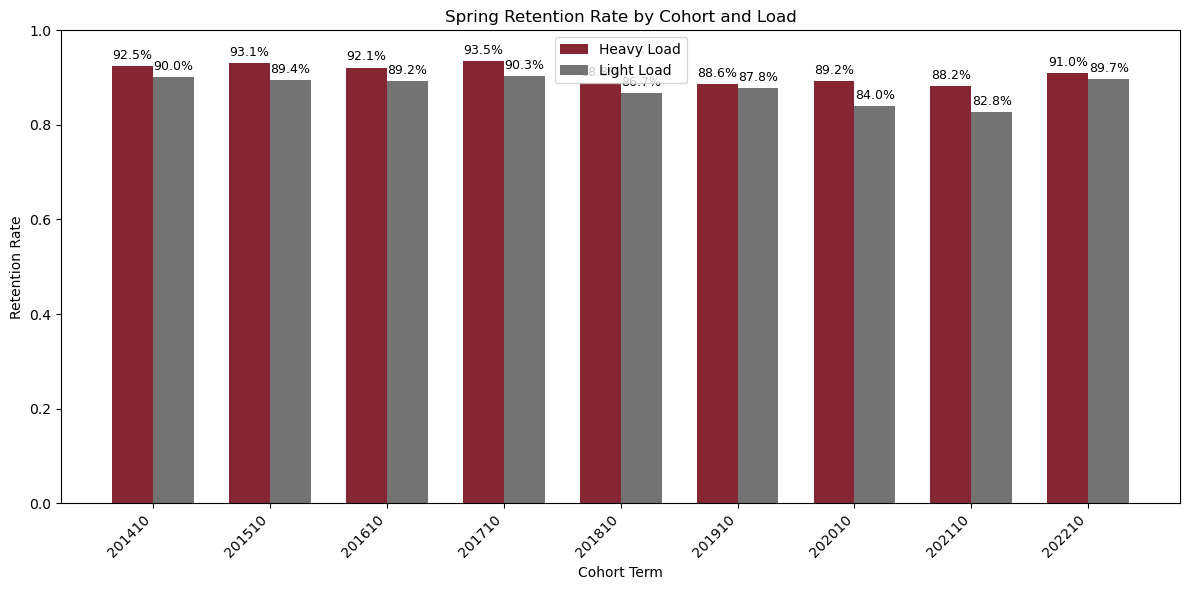

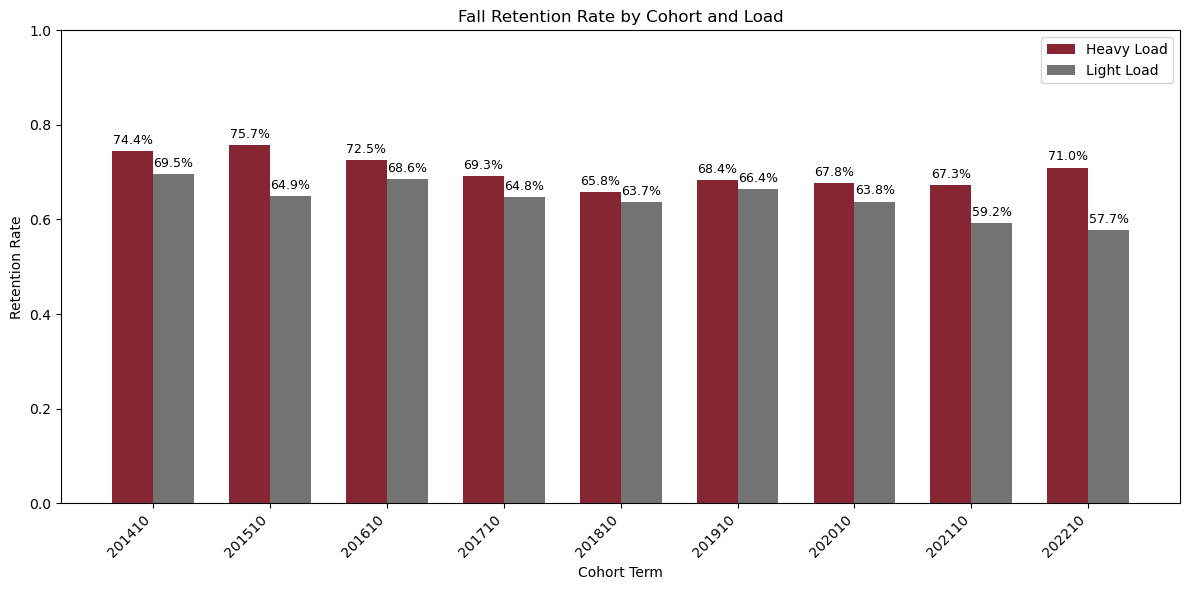

In [38]:
plot_retention_compare(spring_df, 'Spring Retention Rate by Cohort and Load')
plot_retention_compare(fall_df, 'Fall Retention Rate by Cohort and Load')

### Graduation Rates

As above, let's look at graduation rates for the entire cohort population over the last few years to get a baseline. 

**As shown in the visuals below, MSU's four year graduation rates are around 20-25% and six year graduation rates are around 40-45%.** 

In [41]:
# Overall 4-year graduation rate per cohort
grad4_rate = df_cohort.groupby('BFRCohort')['GRAD4'].apply(lambda x: (x == 4).mean())

# Overall 6-year graduation rate per cohort
grad6_rate = df_cohort.groupby('BFRCohort')['GRAD6'].apply(lambda x: (x == 6).mean())

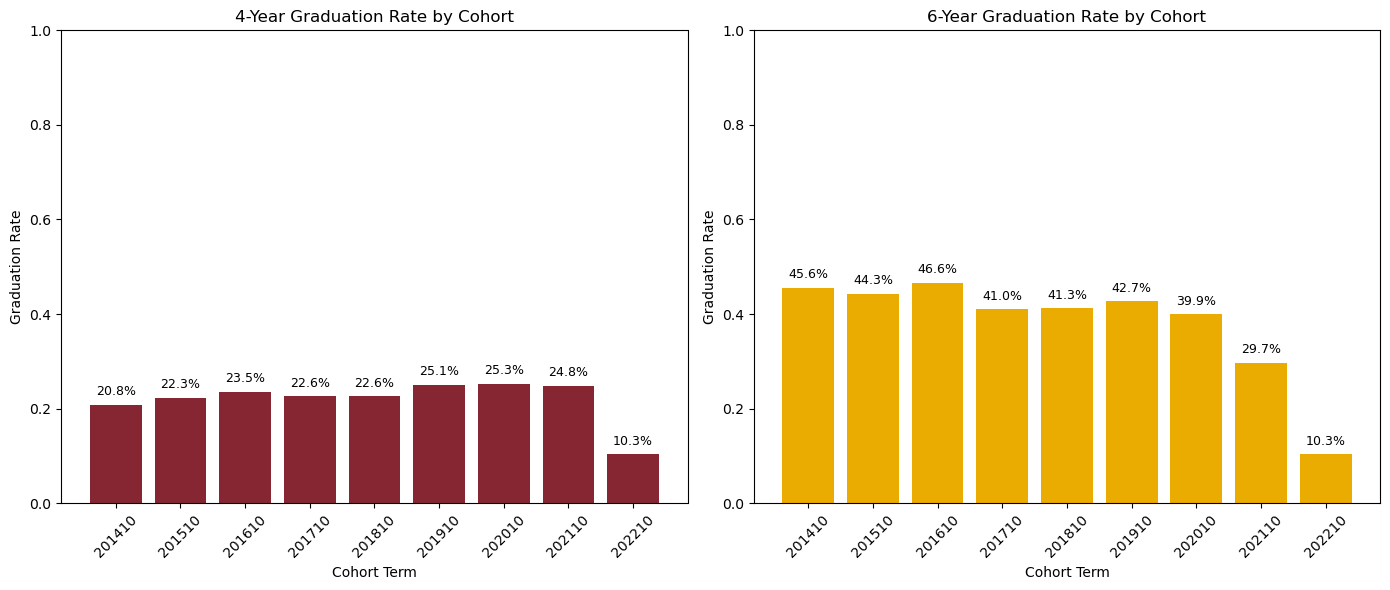

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 4-Year Graduation Rate plot
axes[0].bar(grad4_rate.index, grad4_rate.values, color='#862633')  # green
axes[0].set_title('4-Year Graduation Rate by Cohort')
axes[0].set_ylabel('Graduation Rate')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Cohort Term')
axes[0].tick_params(axis='x', rotation=45)
for i, val in enumerate(grad4_rate.values):
    axes[0].text(i, val + 0.02, f'{val*100:.1f}%', ha='center', fontsize=9)

# 6-Year Graduation Rate plot
axes[1].bar(grad6_rate.index, grad6_rate.values, color='#EAAC00')  # red
axes[1].set_title('6-Year Graduation Rate by Cohort')
axes[1].set_ylabel('Graduation Rate')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Cohort Term')
axes[1].tick_params(axis='x', rotation=45)
for i, val in enumerate(grad6_rate.values):
    axes[1].text(i, val + 0.02, f'{val*100:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Graduation Rates by Load Category

Just as we did for retention rates, let's break up graduation rates by load category.   

As shown below, yet again, an interesting and unexpected trend has emerged. **Four year and six year graduation rates are actually lower across the board for students taking a lighter course load**, as compared to those taking a heavy course load. 

In [45]:
# Filter heavy and light load dataframes
df_heavy = df_cohort[df_cohort['LOAD_HEAVY'] == 1]
df_light = df_cohort[df_cohort['LOAD_LIGHT'] == 1]

# Calculate 4-year graduation rates by cohort
grad4_heavy = df_heavy.groupby('BFRCohort')['GRAD4'].apply(lambda x: (x == 4).mean())
grad4_light = df_light.groupby('BFRCohort')['GRAD4'].apply(lambda x: (x == 4).mean())

# Calculate 6-year graduation rates by cohort
grad6_heavy = df_heavy.groupby('BFRCohort')['GRAD6'].apply(lambda x: (x == 6).mean())
grad6_light = df_light.groupby('BFRCohort')['GRAD6'].apply(lambda x: (x == 6).mean())

In [46]:
grad4_df = pd.DataFrame({
    'Heavy Load': grad4_heavy,
    'Light Load': grad4_light
}).fillna(0)

grad6_df = pd.DataFrame({
    'Heavy Load': grad6_heavy,
    'Light Load': grad6_light
}).fillna(0)

In [47]:
def plot_grad_compare(df, title):
    cohorts = df.index
    heavy_vals = df['Heavy Load'].values
    light_vals = df['Light Load'].values

    x = np.arange(len(cohorts))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, heavy_vals, width, label='Heavy Load', color = '#862633')
    bars2 = ax.bar(x + width/2, light_vals, width, label='Light Load', color = '#737373')

    ax.set_ylabel('Graduation Rate')
    ax.set_xlabel('Cohort Term')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(cohorts, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height*100:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

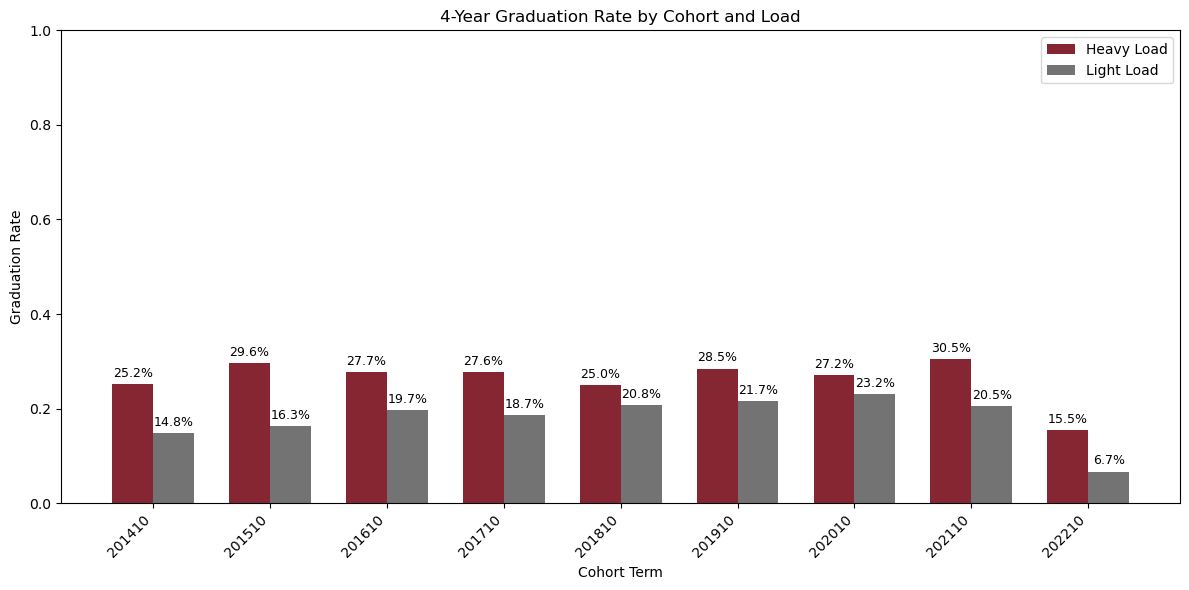

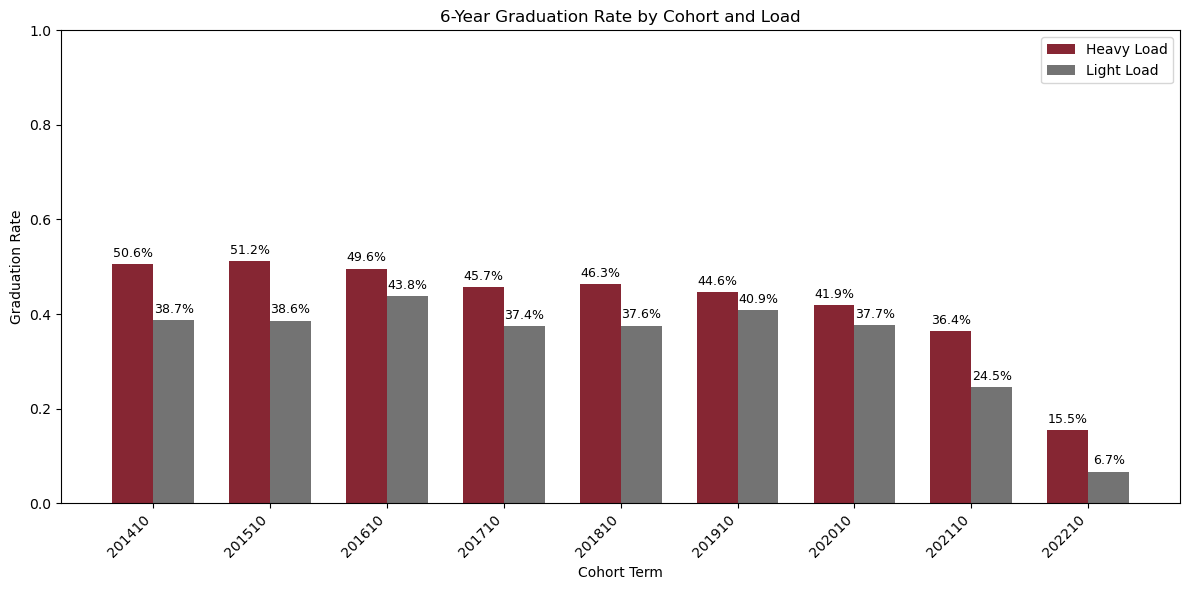

In [48]:
plot_grad_compare(grad4_df, '4-Year Graduation Rate by Cohort and Load')
plot_grad_compare(grad6_df, '6-Year Graduation Rate by Cohort and Load')

## T-Testing

The next step of my analysis is to determine whether or not there is a statistically significant difference between the two load categories, as it relates to the success metrics - retention and graduation. This will allow us to understand if the differences between the two categories (if they exist) are due to random chance or not. 

In [51]:
from scipy.stats import ttest_ind

# Binary outcomes
df_cohort['fall_retained'] = df_cohort['RETAINEDTONEXTFALL'] == 2
df_cohort['spring_retained'] = df_cohort['RETAINEDTONEXTSPRING'] == 2
df_cohort['grad4'] = df_cohort['GRAD4'] == 4
df_cohort['grad6'] = df_cohort['GRAD6'] == 6
heavy = df_cohort[df_cohort['LOAD_HEAVY'] == 1]
light = df_cohort[df_cohort['LOAD_LIGHT'] == 1]

# T-tests
tests = {
    'Fall Retention': ttest_ind(heavy['fall_retained'], light['fall_retained'], nan_policy='omit'),
    'Spring Retention': ttest_ind(heavy['spring_retained'], light['spring_retained'], nan_policy='omit'),
    '4-Year Graduation': ttest_ind(heavy['grad4'], light['grad4'], nan_policy='omit'),
    '6-Year Graduation': ttest_ind(heavy['grad6'], light['grad6'], nan_policy='omit')
}

# Means
means = {
    'Fall Retention': (heavy['fall_retained'].mean(), light['fall_retained'].mean()),
    'Spring Retention': (heavy['spring_retained'].mean(), light['spring_retained'].mean()),
    '4-Year Graduation': (heavy['grad4'].mean(), light['grad4'].mean()),
    '6-Year Graduation': (heavy['grad6'].mean(), light['grad6'].mean())
}

C:\Users\darin.young\AppData\Local\Temp\ipykernel_36520\3925494103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['fall_retained'] = df_cohort['RETAINEDTONEXTFALL'] == 2
C:\Users\darin.young\AppData\Local\Temp\ipykernel_36520\3925494103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['spring_retained'] = df_cohort['RETAINEDTONEXTSPRING'] == 2
C:\Users\darin.young\AppData\Local\Temp\ipykernel_36520\3925494103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [52]:
summary_data = []

for key in tests:
    tstat, pval = tests[key].statistic, tests[key].pvalue
    mean_heavy, mean_light = means[key]
    
    summary_data.append({
        'Metric': key.replace('_', ' ').title(),
        'Heavy Load %': mean_heavy * 100,
        'Light Load %': mean_light * 100,
        'T-Statistic': tstat,
        'P-Value': pval
    })

summary_df = pd.DataFrame(summary_data)

def format_pval(p):
    return f"{p:.4f}" if p >= 0.001 else f"{p:.2e}"

styled_df = (
    summary_df.style
    .format({
        'Heavy Load %': '{:.1f}%',
        'Light Load %': '{:.1f}%',
        'T-Statistic': '{:.3f}',
        'P-Value': format_pval
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#862633'), 
                                    ('color', 'white'),
                                    ('text-align', 'center'),
                                    ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
    .set_caption("T-Test Summary Table")
)

display(styled_df)

,Metric,Heavy Load %,Light Load %,T-Statistic,P-Value
0,Fall Retention,70.4%,64.2%,5.604,2.17e-08
1,Spring Retention,90.7%,87.7%,4.125,3.74e-05
2,4-Year Graduation,26.5%,18.1%,8.667,5.40e-18
3,6-Year Graduation,43.3%,33.9%,8.240,2.03e-16


**As shown above, in every case, the P-value is less than .05, implying that with 95% certainty, there is a statistically significant difference between outcomes for students who take heavy course loads vs light course loads.**

Additionally, the mean values for heavy course load is larger than that of light course load across the board, implying heavy load students have higher levels of success (in this context), consistently. 

## Logistic Regression

Next, I will attempt to predict each success metric based on a student's load category using a logistic regression. 

For clarity, I made some changes to the dataset in this step. Specifically, I created a "LOAD_BINARY" column that acts as a 1/0 flag, where 1 = heavy and 0 = light. This is essentialy for logistic regression - the process is shown below. 

**With that said, the models shown below will be based on students that take a heavy course load. Consider the results with that in mind.**

In [56]:
df_logit = df_cohort[(df_cohort['LOAD_HEAVY'] == 1) | (df_cohort['LOAD_LIGHT'] == 1)].copy() # only includes rows where students are heavy or light
df_logit['LOAD_BINARY'] = df_logit['LOAD_HEAVY']  # 1 = heavy, 0 = light for the binary column

# create binary columns to predict 
df_logit['fall_retained'] = df_logit['RETAINEDTONEXTFALL'] == 2
df_logit['spring_retained'] = df_logit['RETAINEDTONEXTSPRING'] == 2
df_logit['grad4'] = df_logit['GRAD4'] == 4
df_logit['grad6'] = df_logit['GRAD6'] == 6

In [57]:
import statsmodels.api as sm

def run_logit(df, outcome_var):
    X = sm.add_constant(df['LOAD_BINARY'])  # intercept + predictor
    y = df[outcome_var]
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    return result

logit_results = {
    'Fall Retention': run_logit(df_logit, 'fall_retained'),
    'Spring Retention': run_logit(df_logit, 'spring_retained'),
    '4-Year Graduation': run_logit(df_logit, 'grad4'),
    '6-Year Graduation': run_logit(df_logit, 'grad6'),
}

for label, result in logit_results.items():
    print(f'\n=== {label} ===')
    print(result.summary())


=== Fall Retention ===
                           Logit Regression Results                           
Dep. Variable:          fall_retained   No. Observations:                 7265
Model:                          Logit   Df Residuals:                     7263
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                0.003408
Time:                        03:29:02   Log-Likelihood:                -4585.6
converged:                       True   LL-Null:                       -4601.3
Covariance Type:            nonrobust   LLR p-value:                 2.138e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5835      0.034     17.283      0.000       0.517       0.650
LOAD_BINARY     0.2810      0.050      5.586      0.000       0.182       0.380

=== Spring Retention ==

#### Results

As shown above, it is clear that student's taking a heavy course load serve as a great predictor for nearly every metric of success in this context. 

**In fact, the logistic regression model above implies that 48% of the variance in a student graduating in 4 years can be explained by a student taking 15+ hours in their first semester.**

In [60]:
import numpy as np
import pandas as pd
from IPython.display import display

for label, result in logit_results.items():
    odds_ratios = np.exp(result.params)
    p_values = result.pvalues
    
    df_or = pd.DataFrame({
        'Odds Ratio': odds_ratios,
        'P-Value': p_values
    })
    
    def format_pval(p):
        return f"{p:.4f}" if p >= 0.001 else f"{p:.2e}"
    
    styled_df = (
        df_or.style
        .format({
            'Odds Ratio': '{:.3f}',
            'P-Value': format_pval
        })
        .set_table_styles([
            {'selector': 'th', 'props': [
                ('background-color', '#862633'), 
                ('color', 'white'),
                ('text-align', 'center'),
                ('font-weight', 'bold')
            ]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        .set_caption(f"{label} - Odds Ratios and P-Values")
    )
    
    display(styled_df)

,Odds Ratio,P-Value
const,1.792,6.29e-67
LOAD_BINARY,1.324,2.32e-08


,Odds Ratio,P-Value
const,7.156,0.00e+00
LOAD_BINARY,1.371,3.98e-05


,Odds Ratio,P-Value
const,0.221,1.12e-282
LOAD_BINARY,1.632,9.31e-18


,Odds Ratio,P-Value
const,0.513,6.38e-85
LOAD_BINARY,1.487,2.68e-16


Additionally, I felt it would be interesting to extrapolate the "odds" for each of these success metrics. The results are summarized below:

- **Students who take a heavy course load in their first semester are:**
    - 1.32x more likely to retain to the next fall
    - 1.37x more likely to retain to the next fall
    - 1.63x more likely to graduate within 4 years
    - 1.48x more likely to graduate within 6 years

## Propensity Score Matching

To reinforce the causal inference of the hypothesis, I felt it would be useful to match students based on their propensity score. In other words, match students based on related variables. The ones I felt were most useful for this purpose were:
- High School GPA
- ACT Scores
- SAT Scores
- Age
- Legal Sex

#### High School GPA Issues

With that said, I quickly realized that High School GPA was unusable for this purpose because high schools do not have a standard scale across the board. This is displayed in the violin plot below. 

As you can see, there is a large number of students with scores between 0-20 and some number of students between 80-100. The issue with using this variable is that it's impossible to know what scale is being used for that student's GPA. For example, if a student has a GPA of 3.5, is that based on a 4-point scale? A 5-point scale? A 10-point scale? So, even if we were to match students with similar GPA values, it may not accurately match them based on their true performance in high school.  

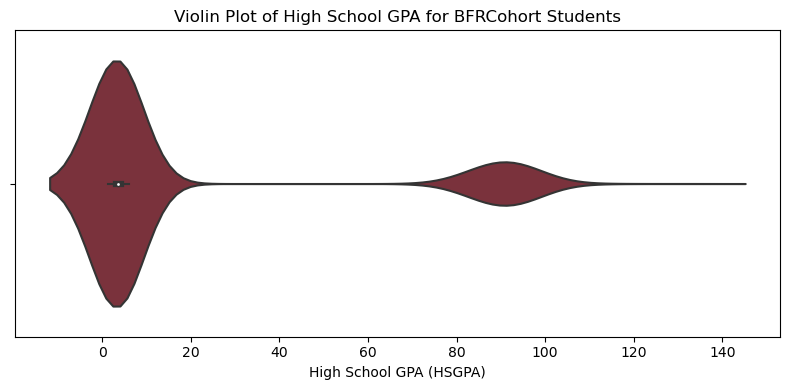

In [66]:
# Make sure HSGPA is numeric and drop missing
hsgpa_data = pd.to_numeric(df_cohort['HSGPA'], errors='coerce').dropna()

plt.figure(figsize=(8, 4))
sns.violinplot(x=hsgpa_data, orient='h', color='#862633')
plt.title('Violin Plot of High School GPA for BFRCohort Students')
plt.xlabel('High School GPA (HSGPA)')
plt.tight_layout()
plt.show()

#### High School Rank Percentage, as an alternative

With that said, a more consistent and standardized measure to compare student performance in high school is high school rank, as a percentage. Remember when I created the HSRANKPERCENT column earlier? 

This is why.

#### Propensity Matching

In [70]:
df_psm = df_cohort[(df_cohort['LOAD_HEAVY'] == 1) | (df_cohort['LOAD_LIGHT'] == 1)].copy()
df_psm['LOAD_BINARY'] = df_psm['LOAD_HEAVY']  # 1 = heavy load, 0 = light

covariates = ['HSRANKPERCENT', 'ACTCOMPOSITE', 'SATOVERALL', 'AGE', 'SEX']

df_psm_encoded = pd.get_dummies(df_psm[covariates + ['LOAD_BINARY']], drop_first=True)

In [71]:
from sklearn.linear_model import LogisticRegression

X = df_psm_encoded.drop(columns=['LOAD_BINARY'])
y = df_psm_encoded['LOAD_BINARY']

logit = LogisticRegression(max_iter=1000)
logit.fit(X, y)
df_psm['propensity_score'] = logit.predict_proba(X)[:, 1]

In [72]:
from sklearn.neighbors import NearestNeighbors

treated = df_psm[df_psm['LOAD_BINARY'] == 1]
control = df_psm[df_psm['LOAD_BINARY'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Get matched control rows
matched_control = control.iloc[indices.flatten()].copy()
matched_treated = treated.reset_index(drop=True).copy()

# Combine matched pairs
matched_df = pd.concat([matched_treated, matched_control], ignore_index=True)

In [73]:
def run_ttest(df, outcome, group_col='LOAD_BINARY'):
    heavy = df[df[group_col] == 1][outcome]
    light = df[df[group_col] == 0][outcome]
    tstat, pval = ttest_ind(heavy, light, nan_policy='omit')
    mean_heavy = heavy.mean()
    mean_light = light.mean()
    return mean_heavy, mean_light, pval

# 1. Pre-match results
pre_results = {}
for outcome in ['fall_retained', 'spring_retained', 'grad4', 'grad6']:
    pre_results[outcome] = run_ttest(df_logit, outcome)

# 2. Post-match results
post_results = {}
for outcome in ['fall_retained', 'spring_retained', 'grad4', 'grad6']:
    post_results[outcome] = run_ttest(matched_df, outcome)

In [74]:
summary_rows = []
for outcome in pre_results.keys():
    pre_mean_heavy, pre_mean_light, pre_p = pre_results[outcome]
    post_mean_heavy, post_mean_light, post_p = post_results[outcome]
    
    summary_rows.append({
        'Outcome': outcome.replace('_', ' ').title(),
        'Pre-Match Heavy Mean': pre_mean_heavy * 100,
        'Pre-Match Light Mean': pre_mean_light * 100,
        'Pre-Match P-Value': pre_p,
        'Post-Match Heavy Mean': post_mean_heavy * 100,
        'Post-Match Light Mean': post_mean_light * 100,
        'Post-Match P-Value': post_p,
    })

summary_df = pd.DataFrame(summary_rows)

# Define formatting function for p-values
def format_pval(p):
    if p < 0.001:
        return f"{p:.2e}"
    else:
        return f"{p:.3f}"

# Apply formatting and style
styled_summary = (
    summary_df.style
    .format({
        'Pre-Match Heavy Mean': '{:.1f}%',
        'Pre-Match Light Mean ': '{:.1f}%',
        'Post-Match Heavy Mean ': '{:.1f}%',
        'Post-Match Light Mean': '{:.1f}%',
        'Pre-Match P-Value': format_pval,
        'Post-Match P-Value': format_pval,
    })
    .set_properties(subset=['Outcome'], **{'font-weight': 'bold', 'text-align': 'left'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#862633'), ('color', 'white'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
    ])
    .set_caption("Pre- and Post-Matching Outcome Comparison")
)

display(styled_summary)

,Outcome,Pre-Match Heavy Mean,Pre-Match Light Mean,Pre-Match P-Value,Post-Match Heavy Mean,Post-Match Light Mean,Post-Match P-Value
0,Fall Retained,70.4%,64.186534,2.17e-08,70.359629,63.7%,3.17e-09
1,Spring Retained,90.7%,87.739062,3.74e-05,90.748260,87.6%,2.39e-05
2,Grad4,26.5%,18.077024,5.40e-18,26.479118,18.9%,7.04e-14
3,Grad6,43.3%,33.900969,2.03e-16,43.271462,35.1%,3.23e-12


#### Results

As shown above, when you compare the mean values and p-values for each metric before and after propensity matching, it's clear that **there is a statistically significant difference between taking heavy course loads vs light course. And this remains true even for student's that generally have the same backgrounds (propensity scores) upon entering college.**

# Conclusion

Overall, this analysis has been extremely surprising. Like Dr. Harris, I expected that student's taking a lighter course load would be generally more successful compared to those taking a heavier course load. Imagine the surprise on my face as I slowly progressed through each step and began to realize that **my hypothesis was exactly wrong.** 

Based on the results of my analysis, it seems totally clear: **students should take 15 or more hours in their first semester to have the best chance of success,** assuming they have the means to do so. 

# Limitations

The main limitations for this analysis are as follows:
- **Small sample size**
    - Each cohort is less than 1,000 students. New trends could emerge if we worked with larger datasets across multiple colleges of similar size/status.
- **Student preparedness**
    - Although this analysis may be accurate for MSU students, this likely should not be expanded outwards to other universities considering the varying levels of selectivity in their admittance processes. It's possible that Harvard students **should** take less hours considering the more rigorous programs, for example.
- **Course difficulty**
    - Depending on the program, a course load of 15 hours can be extremely different in terms of rigor from one student to the next. Even if student's have similar propensity scores, they may be in different programs with different rigor.
        - This could be addressed by adding "college" or "major" as a covariate to match students. However, considering the small sample size overall, it could be ineffective for majors with small numbers of students.
- **Statistical significance does not always imply practical significance**
    -  Ultimately, the differences in retention and graduation rates are not massive overall - roughly 5-10% in most cases.
    -  Although there is a difference between the populations, it may not be significant enough to take action. 

# Assumptions

The main assumptions for this analysis are as follows:
- **Cohort Equivalence**
    - In order to evaluate cohorts over time, we must assume that the population of students over time is generally similar. Otherwise, the analyses over time are mostly meaningless.
- **All students can reasonably take 15 hours**
    - There are many extenuating factors that can contribute to a student's decisions to take more/less credit hours in their first semester (financial limitations, work/family commitments, registration caps, etc.). My recommendation assumes that each student has reasonable means to take a heavy course load.  

# Challenges

The main challenge I faced during this analysis was likely the same challenge that most data professionals face - cleaning and preparing the data. One of my professors during my undergrad at Wilmington University stated that data professionals spend about 80% of their time cleaning and preparing data and only 20% actually analyzing the data. I can attest to that. Cleaning and preparing is an iterative process that requires fine-tuning and adjusting. As you move further through your analysis, there may be new things to add or change to prepare your data appropriately. It can be extremely tedious but it's what makes this process so fun and rewarding. 

Aside from that, the other challenge worth mentioning was inconsistency or unavailability of data. The fact that high schools don't have a standardized GPA scale across the board absolutely makes it hard to compare student's accurately. Additionally, not every student takes the ACT or SAT, and those that do may only take one but not the other. This issue also makes it difficult to match students based on their academic backgrounds. 

# Future Uses/Additional Applications

I think an additional application for this analysis could be to evaluate a student's GPA in the spring term after they enter and their overall GPA after their first year. In this analysis, I only considered if a student was retained to the next semester/year but I didn't consider how well they were actually doing in their classes. **It could be the case that student's who take heavier loads are more likely to be invested in remaining in college, but generally have lower grades due to the heavier workload.**

# Recommendations

At the conclusion of this analysis, **my recommendation is that MSU faculty, executive leadership, and student advisors all make a concerted effort to incentivize student's to take a 15+ hour course load.** Based on my analysis, it's clear that taking a heavy course load certainly contributes to higher levels of retention and graduating on time. 

Additionally, **I recommend that student support services specifically target first time students who take less than 15 hours.** These students are less likely to be retained to the following semesters and less likely to graduate on time, so they should be supported in any way possible to combat that trend. 

# Implementation Plan

Implementation for this type of thing can be challenging and nuanced, but here is my recommendation:

1. Share detailed results with executive leadership and decision makers to determine priority.
2. Share summarized results of this study with advisors and faculty to increase awareness.
3. Coordinate with marketing department to ensure study results are published online near student link to registration.
4. Create infographic for advisors to provide to students (hang in their office, hang in student common areas, disperse through online mediums, etc.).
5. Coordinate with student support services to ensure they target students taking a light course load.
6. Reevaluate and improve model/analysis as time allows.

# Ethical Assessment

- Application of Results
    - This analysis could affect real decisions made by real students. It's important to consider that every student has their own story and their own limitations. If they feel pressured to over-work themselves based on their awareness of this study or its conclusions, it could have an unexpected advese affect on their college experience.
- Fairness/Bias
    - Again, each student is unique and has their own challenges. Some factors are totally out of a students control such as socio-economic status, first generation status, work-life balance, etc. By making this recommendation - students should take 15 hours - it's possible that students may feel targeted unfairly without a consideration for these (or other) factors that are out of their control.